## **End to End Backpack Challenges**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **lets import tools**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
import joblib

## **Lets Import the data**


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Backpack Prediction /train.csv")

# only numeric data
df_numeric = df.select_dtypes(include=np.number)

#test data
df_test = pd.read_csv("/content/drive/MyDrive/Backpack Prediction /test.csv")

# copy the data set
df_copy = df.copy()
df_test_copy = df_test.copy()

In [ ]:
# lets drop id columns in dataset
df_copy.drop('id',axis=1,inplace=True)
df_test_copy.drop('id',axis=1,inplace=True)

In [ ]:
df_copy.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
df_test_copy.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [ ]:
df_numeric.head()

,id,Compartments,Weight Capacity (kg),Price
0,0,7.0,11.611723,112.15875
1,1,10.0,27.078537,68.88056
2,2,2.0,16.643760,39.17320
3,3,8.0,12.937220,80.60793
4,4,1.0,17.749338,86.02312


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
df.isnull().sum()

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.750000,149999.500000,224999.250000,299999.0
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


## **Value Counts**

In [ ]:
# objects data types value counts
for label,content in df.items():
  if pd.api.types.is_object_dtype(content):
    print(f'value count for Column Object:{label}')
    print(df[label].value_counts())
    print('--'*40)

value count for Column Object:Brand
Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64
--------------------------------------------------------------------------------
value count for Column Object:Material
Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
Name: count, dtype: int64
--------------------------------------------------------------------------------
value count for Column Object:Size
Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64
--------------------------------------------------------------------------------
value count for Column Object:Laptop Compartment
Laptop Compartment
Yes    148342
No     144214
Name: count, dtype: int64
--------------------------------------------------------------------------------
value count for Column Object:Waterproof
Waterproof
Yes    148077
No     144873
Name: count, dtype: int64
---

In [ ]:
# value counts for numeric columns

for label,content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    print(f'value count for numeric column:{label}')
    print(df[label].value_counts())
    print('--'*40)


value count for numeric column:id
id
0         1
199988    1
200004    1
200003    1
200002    1
         ..
99999     1
99998     1
99997     1
99996     1
299999    1
Name: count, Length: 300000, dtype: int64
--------------------------------------------------------------------------------
value count for numeric column:Compartments
Compartments
1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0    29815
8.0     28909
6.0     27240
Name: count, dtype: int64
--------------------------------------------------------------------------------
value count for numeric column:Weight Capacity (kg)
Weight Capacity (kg)
5.000000     4286
30.000000     185
11.898250     123
22.898382     116
14.908437     101
             ... 
6.938551        1
8.093085        1
22.013824       1
13.246538       1
6.175738        1
Name: count, Length: 181596, dtype: int64
--------------------------------------------------------------------------------
value coun

## **Feature Engineering**

#### **Clustering for Train Dataset**

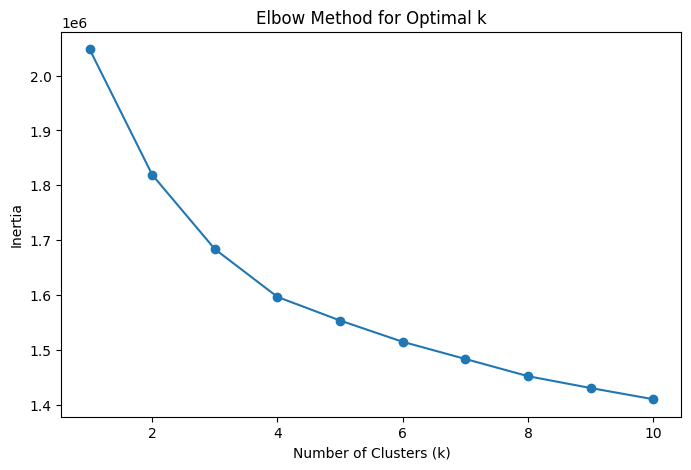

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define categorical and numerical columns
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
num_cols = ['Compartments', 'Weight Capacity (kg)']

# Define Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing Pipeline
preprocessor_cluster = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# Apply Preprocessing
df_transformed_for_cluster = preprocessor_cluster.fit_transform(df_copy)

# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_transformed_for_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()




In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

# Find the elbow point
knee_locator = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

print(f"Optimal number of clusters: {optimal_k}")


Optimal number of clusters: 4


In [ ]:
# Fit the final clustering model with optimal k
optimal_k =  4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_copy['Cluster'] = kmeans.fit_predict(df_transformed_for_cluster)

In [ ]:
df_copy
# now we successfully added cluster column to our original dataset

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Cluster
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,3
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,1
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,0
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,3
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,0
...,...,...,...,...,...,...,...,...,...,...,...
299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749,3
299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819,1
299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364,3
299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080,0


##**Test Data Clustering**

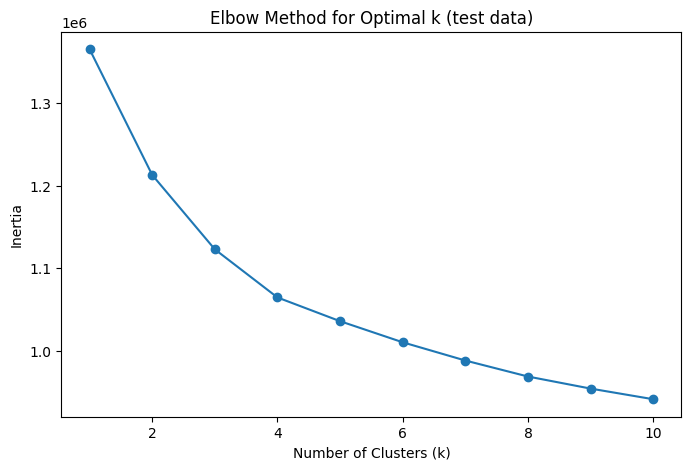

In [ ]:
# Apply Preprocessing
df_test_transformed_for_cluster = preprocessor_cluster.fit_transform(df_test_copy)

# Determine optimal clusters using Elbow Method
inertia1 = []
K_range1 = range(1, 11)

for j in K_range1:
    kmeans = KMeans(n_clusters=j, random_state=42, n_init=10)
    kmeans.fit(df_test_transformed_for_cluster)
    inertia1.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range1, inertia1, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (test data)")
plt.show()


In [ ]:
from kneed import KneeLocator

# Find the elbow point
knee_locator = KneeLocator(K_range1, inertia1, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 4


In [ ]:
# Fit the final clustering model with optimal k
optimal_k =  4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_test_copy['Cluster'] = kmeans.fit_predict(df_test_transformed_for_cluster)

In [ ]:
df_test_copy

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Cluster
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147,1
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105,0
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799,0
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036,1
4,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953,3
...,...,...,...,...,...,...,...,...,...,...
199995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498,3
199996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394,0
199997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163,2
199998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153,2


##**Baseline Model Pipeline For SGDRegressor**

In [ ]:
import datetime
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import joblib

# Load and preprocess data
X = df_copy.drop(columns=['Price'])
y = df_copy['Price']
X_test = df_test_copy.copy()

# Extract 'id' for later use
X['id'] = df['id']
X_test['id'] = df_test['id']

# Define categorical and numerical columns
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
num_cols = ['Compartments', 'Weight Capacity (kg)']

# Define Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Model Pipeline with Gradient Descent
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
])

# Generate Timestamp
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Prepare OOF array
oof_predictions = np.zeros(len(X))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, valid_index) in enumerate(kf.split(X), 1):
    # Split Data
    X_train_cv, X_valid_cv = X.iloc[train_index], X.iloc[valid_index]
    y_train_cv, y_valid_cv = y.iloc[train_index], y.iloc[valid_index]

    # Train Model
    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)

    # Store OOF Predictions
    oof_predictions[valid_index] = preds

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_valid_cv, preds))
    rmse_scores.append(rmse)

    print(f"Fold {fold} - RMSE: {rmse:.4f}")

# Print Average Scores
print("RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

# Save OOF Predictions
oof_df = pd.DataFrame({
    'id': X['id'],
    'oof_predictions': oof_predictions
})

oof_filename = f"oof_predictions_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# Train on Full Dataset & Predict on Test
model_pipeline.fit(X, y)
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
test_preds = model_pipeline.named_steps['regressor'].predict(X_test_transformed)

# Save Trained Model
model_filename = f"model_{timestamp_str}.pkl"
joblib.dump(model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# Prepare Submission File
submission = pd.DataFrame({
    'id': X_test['id'],
    'Price': test_preds
})

submission_filename = f"submission_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

Fold 1 - RMSE: 38.9281
Fold 2 - RMSE: 39.0560
Fold 3 - RMSE: 39.0263
Fold 4 - RMSE: 39.0863
Fold 5 - RMSE: 39.0217
RMSE Scores: [38.92808299248763, 39.05595312694644, 39.02626331291155, 39.08633117911205, 39.02172708661695]
Average RMSE: 39.023671539614924
OOF predictions saved as oof_predictions_20250206_035150.csv
Trained model saved as model_20250206_035150.pkl
Submission saved as submission_20250206_035150.csv


##### **Here is the Submission Score for Above model**


> **Baseline model SGD Reegressor Result**



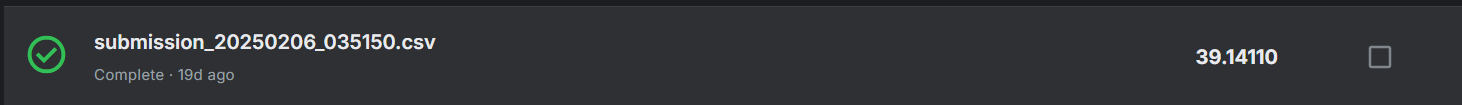

##**Baseline Model for Catboost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
import datetime
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import joblib
import catboost
from catboost import CatBoostRegressor

# Load and preprocess data
X = df_copy.drop(columns=['Price'])
y = df_copy['Price']
X_test = df_test_copy.copy()

# Extract 'id' for later use
X['id'] = df['id']
X_test['id'] = df_test['id']

# Define categorical and numerical columns
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
num_cols = ['Compartments', 'Weight Capacity (kg)']

# Define Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Model Pipeline with CatBoost
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42, verbose=0))
])

# Generate Timestamp
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Prepare OOF array
oof_predictions = np.zeros(len(X))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, valid_index) in enumerate(kf.split(X), 1):
    # Split Data
    X_train_cv, X_valid_cv = X.iloc[train_index], X.iloc[valid_index]
    y_train_cv, y_valid_cv = y.iloc[train_index], y.iloc[valid_index]

    # Train Model
    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)

    # Store OOF Predictions
    oof_predictions[valid_index] = preds

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_valid_cv, preds))
    rmse_scores.append(rmse)

    print(f"Fold {fold} - RMSE: {rmse:.4f}")

# Print Average Scores
print("RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

# Save OOF Predictions
oof_df = pd.DataFrame({
    'id': X['id'],
    'oof_predictions': oof_predictions
})

oof_filename = f"oof_predictions_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# Train on Full Dataset & Predict on Test
model_pipeline.fit(X, y)
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
test_preds = model_pipeline.named_steps['regressor'].predict(X_test_transformed)

# Save Trained Model
model_filename = f"model_{timestamp_str}.pkl"
joblib.dump(model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# Prepare Submission File
submission = pd.DataFrame({
    'id': X_test['id'],
    'Price': test_preds
})

submission_filename = f"submission_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")


Fold 1 - RMSE: 38.9792
Fold 2 - RMSE: 39.1394
Fold 3 - RMSE: 39.1126
Fold 4 - RMSE: 39.1317
Fold 5 - RMSE: 39.0897
RMSE Scores: [38.97916002654542, 39.1393681371842, 39.112609236028085, 39.13167797719314, 39.089712366999564]
Average RMSE: 39.09050554879008
OOF predictions saved as oof_predictions_20250206_035757.csv
Trained model saved as model_20250206_035757.pkl
Submission saved as submission_20250206_035757.csv


##### **Here is the Submission Score for Above model**


> **Baseline Model Catboost Result**


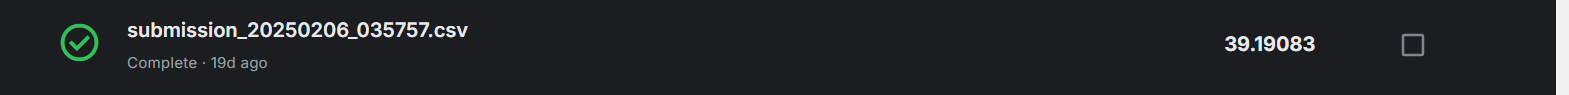


##**Baseline Model for XGBoost**

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost
!pip install kneed
!pip install catboost

import datetime
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import joblib
import xgboost as xgb
from sklearn.base import BaseEstimator, RegressorMixin #for wrapper


# Define categorical and numerical columns
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
num_cols = ['Compartments', 'Weight Capacity (kg)']


# Define Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Define XGBRegressor wrapper for compatibility
class XGBRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.regressor = xgb.XGBRegressor(**kwargs)

    def fit(self, X, y):
        self.regressor.fit(X, y)
        return self

    def predict(self, X):
        return self.regressor.predict(X)

    def __sklearn_is_fitted__(self):  # Add this method for compatibility
        return hasattr(self.regressor, "best_iteration")

# Model Pipeline with XGBoost
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressorWrapper(objective='reg:squarederror', n_estimators=100, random_state=42))
])

# Data Preparation
X = df_copy.drop(columns=['Price'])
y = df_copy['Price']
X_test = df_test_copy.copy()

# Extract 'id' for later use
X['id'] = df['id']
X_test['id'] = df_test['id']

# K-Fold Cross-Validation and Training
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
oof_predictions = np.zeros(len(X))
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, valid_index) in enumerate(kf.split(X), 1):
    X_train_cv, X_valid_cv = X.iloc[train_index], X.iloc[valid_index]
    y_train_cv, y_valid_cv = y.iloc[train_index], y.iloc[valid_index]

    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)
    oof_predictions[valid_index] = preds
    rmse = np.sqrt(mean_squared_error(y_valid_cv, preds))
    rmse_scores.append(rmse)
    print(f"Fold {fold} - RMSE: {rmse:.4f}")

print("RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

# Save OOF Predictions
oof_df = pd.DataFrame({'id': X['id'], 'oof_predictions': oof_predictions})
oof_filename = f"oof_predictions_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# Train on Full Dataset and Predict on Test Data
model_pipeline.fit(X, y)
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
test_preds = model_pipeline.named_steps['regressor'].predict(X_test_transformed)

# Save Trained Model
model_filename = f"model_{timestamp_str}.pkl"
joblib.dump(model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# Prepare Submission File
submission = pd.DataFrame({'id': X_test['id'], 'Price': test_preds})
submission_filename = f"submission_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Fold 1 - RMSE: 39.0988


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Fold 2 - RMSE: 39.2528


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Fold 3 - RMSE: 39.1890


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Fold 4 - RMSE: 39.2239


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Fold 5 - RMSE: 39.1747
RMSE Scores: [39.098784144742986, 39.252848052364605, 39.18900664955892, 39.223933075664974, 39.17474567736883]
Average RMSE: 39.18786351994006
OOF predictions saved as oof_predictions_20250206_040340.csv
Trained model saved as model_20250206_040340.pkl
Submission saved as submission_20250206_040340.csv


##### **Here is the Submission Score for Above model**


> **Baseline Model XGBoost Result**

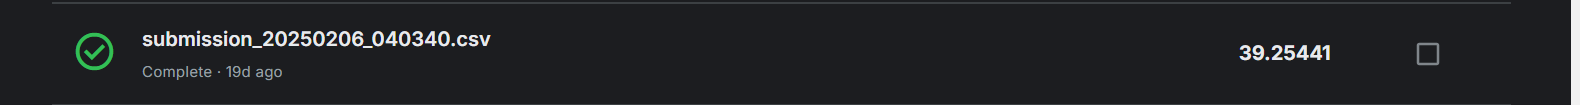

In [ ]:
# iam going to save clustering data

# iam going to save clustering data

#Save df_copy to Google Drive
df_copy_path = '/content/drive/MyDrive/Clustering /df_copy.csv'  # Add a filename to the path
df_copy.to_csv(df_copy_path, index=False)
print(f"df_copy saved to: {df_copy_path}")

df_test_path = '/content/drive/MyDrive/Clustering /df_test_copy.csv'  # Add a filename to the path
df_test_copy.to_csv(df_test_path,index=False)
print(f'df_test_copy saved to: {df_test_path}')


df_copy saved to: /content/drive/MyDrive/Clustering /df_copy.csv
df_test_copy saved to: /content/drive/MyDrive/Clustering /df_test_copy.csv


##**Hyperparameter Tuning with Both Optuna and Bayesian Hyperparameter Tuning**
 > **Lets tune SGD Regressor**

In [ ]:
# Now iam going to use Clustering dataset
df_copy = pd.read_csv('/content/drive/MyDrive/Clustering /df_copy.csv')
df_test_copy = pd.read_csv('/content/drive/MyDrive/Clustering /df_test_copy.csv')
df = pd.read_csv('/content/drive/MyDrive/Backpack Prediction /train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Backpack Prediction /test.csv')

In [ ]:
df_copy

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Cluster
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,3
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,1
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,0
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,3
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,0
...,...,...,...,...,...,...,...,...,...,...,...
299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749,3
299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819,1
299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364,3
299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080,0


In [ ]:
df_test_copy

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Cluster
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147,1
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105,0
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799,0
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036,1
4,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953,3
...,...,...,...,...,...,...,...,...,...,...
199995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498,3
199996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394,0
199997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163,2
199998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153,2


In [ ]:
# prompt: skopt install

!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
# prompt: catboost install

!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


## **Now Lets try to tune Catboost regressor with Bayesian Hyperparameter Tuning**

In [ ]:
import datetime
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import joblib
from skopt import BayesSearchCV  # Bayesian Optimization for Hyperparameter Tuning
from catboost import CatBoostRegressor

# Load and preprocess data
X = df_copy.drop(columns=['Price'])
y = df_copy['Price']
X_test = df_test_copy.copy()

# Extract 'id' for later use
X['id'] = df['id']
X_test['id'] = df_test['id']

# Define categorical and numerical columns
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
num_cols = ['Compartments', 'Weight Capacity (kg)']

# Define Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Model Pipeline with CatBoostRegressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(verbose=0, random_state=42))
])

# Define Bayesian Search Space
param_grid = {
    'regressor__iterations': (500, 2000),
    'regressor__learning_rate': (0.01, 0.3, 'log-uniform'),
    'regressor__depth': (4, 10),
    'regressor__l2_leaf_reg': (1e-4, 10, 'log-uniform'),
    'regressor__border_count': (32, 255),
    'regressor__bagging_temperature': (0.0, 1.0)
}

# Bayesian Hyperparameter Tuning
bayes_search = BayesSearchCV(
    model_pipeline,
    param_grid,
    n_iter=20,  # Number of iterations
    cv=3,  # Cross-validation
    n_jobs=-1,  # Use all processors
    random_state=42,
    scoring='neg_root_mean_squared_error'
)

# Train with Bayesian Optimization
bayes_search.fit(X, y)
print("Best Parameters Found:", bayes_search.best_params_)

# Generate Timestamp
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Prepare OOF array
oof_predictions = np.zeros(len(X))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, valid_index) in enumerate(kf.split(X), 1):
    # Split Data
    X_train_cv, X_valid_cv = X.iloc[train_index], X.iloc[valid_index]
    y_train_cv, y_valid_cv = y.iloc[train_index], y.iloc[valid_index]

    # Create a fresh pipeline with best parameters (remove the 'regressor__' prefix)
    best_model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', CatBoostRegressor(verbose=0, random_state=42,
                                        **{k.split('__')[1]: v for k, v in bayes_search.best_params_.items()}))
    ])

    # Train the fresh model
    best_model_pipeline.fit(X_train_cv, y_train_cv)

    preds = best_model_pipeline.predict(X_valid_cv)

    # Store OOF Predictions
    oof_predictions[valid_index] = preds

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_valid_cv, preds))
    rmse_scores.append(rmse)

    print(f"Fold {fold} - RMSE: {rmse:.4f}")

# Print Average Scores
print("RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

# Save OOF Predictions
oof_df = pd.DataFrame({
    'id': X['id'],
    'oof_predictions': oof_predictions
})

oof_filename = f"oof_predictions_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# Train on Full Dataset & Predict on Test
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(verbose=0, random_state=42,
                                    **{k.split('__')[1]: v for k, v in bayes_search.best_params_.items()}))
])

final_model_pipeline.fit(X, y)
X_test_transformed = final_model_pipeline.named_steps['preprocessor'].transform(X_test)
test_preds = final_model_pipeline.named_steps['regressor'].predict(X_test_transformed)

# Save Trained Model
model_filename = f"model_{timestamp_str}.pkl"
joblib.dump(final_model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# Prepare Submission File
submission = pd.DataFrame({
    'id': X_test['id'],
    'Price': test_preds
})

submission_filename = f"submission_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")


Best Parameters Found: OrderedDict([('regressor__bagging_temperature', 0.0), ('regressor__border_count', 255), ('regressor__depth', 4), ('regressor__iterations', 500), ('regressor__l2_leaf_reg', 6.726567146978787), ('regressor__learning_rate', 0.038779305720967785)])
Fold 1 - RMSE: 38.8984
Fold 2 - RMSE: 39.0362
Fold 3 - RMSE: 39.0080
Fold 4 - RMSE: 39.0571
Fold 5 - RMSE: 38.9930
RMSE Scores: [38.89842927289754, 39.03624850845088, 39.00799205385029, 39.057057832120165, 38.99301672003581]
Average RMSE: 38.998548877470945
OOF predictions saved as oof_predictions_20250208_071318.csv
Trained model saved as model_20250208_071318.pkl
Submission saved as submission_20250208_071318.csv


##### **Here is the Submission Score for Above model**


> **Catboost regressor Result with Bayesian Hyperparameter Tuning**

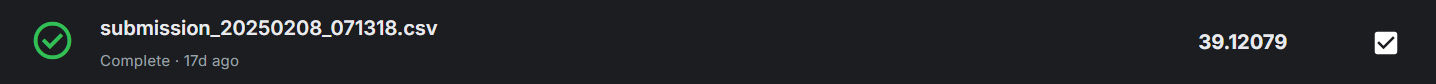


#####**This my best score in this competition**

In [ ]:
# prompt: future warning

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00


##**Lets try to tune catboost With Optuna Hyperparamter tuning**

In [ ]:
import datetime
import numpy as np
import pandas as pd
import joblib
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Load and preprocess data
X = df_copy.drop(columns=['Price'])
y = df_copy['Price']
X_test = df_test_copy.copy()

# Extract 'id' for later use
X['id'] = df['id']
X_test['id'] = df_test['id']

# Define categorical and numerical columns
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
num_cols = ['Compartments', 'Weight Capacity (kg)']

# Define Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

def objective(trial):
    """Objective function for Optuna"""
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'random_state': 42,
        'verbose': 0
    }

    # Split Data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', CatBoostRegressor(**params))
    ])

    model_pipeline.fit(X_train, y_train)
    preds = model_pipeline.predict(X_valid)

    return np.sqrt(mean_squared_error(y_valid, preds))  # RMSE

# Optuna Hyperparameter Optimization
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

print("Best Parameters Found:", study.best_params)

# Prepare OOF array
oof_predictions = np.zeros(len(X))
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, valid_index) in enumerate(kf.split(X), 1):
    X_train_cv, X_valid_cv = X.iloc[train_index], X.iloc[valid_index]
    y_train_cv, y_valid_cv = y.iloc[train_index], y.iloc[valid_index]

    best_model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', CatBoostRegressor(**study.best_params))
    ])

    best_model_pipeline.fit(X_train_cv, y_train_cv)
    preds = best_model_pipeline.predict(X_valid_cv)

    oof_predictions[valid_index] = preds
    rmse = np.sqrt(mean_squared_error(y_valid_cv, preds))
    rmse_scores.append(rmse)
    print(f"Fold {fold} - RMSE: {rmse:.4f}")

# Print Average Scores
print("RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

# Save OOF Predictions
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
oof_df = pd.DataFrame({'id': X['id'], 'oof_predictions': oof_predictions})
oof_filename = f"oof_predictions_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# Train on Full Dataset & Predict on Test
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(**study.best_params))
])

final_model_pipeline.fit(X, y)
X_test_transformed = final_model_pipeline.named_steps['preprocessor'].transform(X_test)
test_preds = final_model_pipeline.named_steps['regressor'].predict(X_test_transformed)

# Save Trained Model
model_filename = f"model_{timestamp_str}.pkl"
joblib.dump(final_model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# Prepare Submission File
submission = pd.DataFrame({'id': X_test['id'], 'Price': test_preds})
submission_filename = f"submission_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")



[I 2025-02-11 03:46:49,837] A new study created in memory with name: no-name-b3e329a4-f5bd-40c1-830a-543add61c8ce
[I 2025-02-11 03:47:23,341] Trial 0 finished with value: 40.6640275205037 and parameters: {'iterations': 1062, 'learning_rate': 0.2536999076681772, 'depth': 9, 'l2_leaf_reg': 0.09846738873614563, 'border_count': 66, 'bagging_temperature': 0.15599452033620265}. Best is trial 0 with value: 40.6640275205037.
[I 2025-02-11 03:47:41,920] Trial 1 finished with value: 39.385033288071284 and parameters: {'iterations': 587, 'learning_rate': 0.19030368381735815, 'depth': 8, 'l2_leaf_reg': 0.3470266988650412, 'border_count': 36, 'bagging_temperature': 0.9699098521619943}. Best is trial 1 with value: 39.385033288071284.
[I 2025-02-11 03:48:18,645] Trial 2 finished with value: 38.90706949977384 and parameters: {'iterations': 1749, 'learning_rate': 0.020589728197687916, 'depth': 5, 'l2_leaf_reg': 0.0008260808399079611, 'border_count': 100, 'bagging_temperature': 0.5247564316322378}. Best

Streaming output truncated to the last 5000 lines.
476:	learn: 38.9749125	total: 8.83s	remaining: 24.9s
477:	learn: 38.9748808	total: 8.85s	remaining: 24.9s
478:	learn: 38.9748439	total: 8.86s	remaining: 24.9s
479:	learn: 38.9747944	total: 8.88s	remaining: 24.8s
480:	learn: 38.9747551	total: 8.91s	remaining: 24.9s
481:	learn: 38.9747082	total: 8.93s	remaining: 24.8s
482:	learn: 38.9746297	total: 8.94s	remaining: 24.8s
483:	learn: 38.9745691	total: 8.96s	remaining: 24.8s
484:	learn: 38.9745253	total: 8.97s	remaining: 24.8s
485:	learn: 38.9744929	total: 8.99s	remaining: 24.7s
486:	learn: 38.9744472	total: 9.01s	remaining: 24.7s
487:	learn: 38.9744149	total: 9.03s	remaining: 24.7s
488:	learn: 38.9743876	total: 9.04s	remaining: 24.7s
489:	learn: 38.9743311	total: 9.06s	remaining: 24.6s
490:	learn: 38.9742580	total: 9.07s	remaining: 24.6s
491:	learn: 38.9742062	total: 9.09s	remaining: 24.6s
492:	learn: 38.9741802	total: 9.1s	remaining: 24.6s
493:	learn: 38.9741398	total: 9.12s	remaining: 24

##### **Here is the Submission Score for Above model**


> **Catboost With Optuna Hyperparamter tuning**


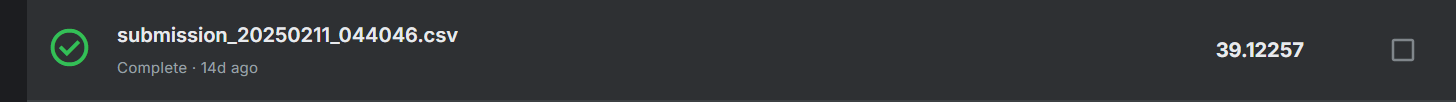


##**Lets try to tune SGD Regressor With Optuna Hyperparamter tuning**

In [ ]:
import datetime
import numpy as np
import pandas as pd
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Load and preprocess data
X = df_copy.drop(columns=['Price'])
y = df_copy['Price']
X_test = df_test_copy.copy()

# Extract 'id' for later use
X['id'] = df['id']
X_test['id'] = df_test['id']

# Define categorical and numerical columns
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
num_cols = ['Compartments', 'Weight Capacity (kg)']

# Define Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

def objective(trial):
    """Objective function for Optuna"""
    params = {
        'alpha': trial.suggest_loguniform('alpha', 1e-6, 1e-1),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive']),
        'eta0': trial.suggest_loguniform('eta0', 1e-4, 1),
        'max_iter': trial.suggest_int('max_iter', 500, 2000),
        'tol': trial.suggest_loguniform('tol', 1e-4, 1e-2)
    }

    # Split Data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', SGDRegressor(**params, random_state=42))
    ])

    model_pipeline.fit(X_train, y_train)
    preds = model_pipeline.predict(X_valid)

    return np.sqrt(mean_squared_error(y_valid, preds))  # RMSE

# Optuna Hyperparameter Optimization
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)

print("Best Parameters Found:", study.best_params)

# Prepare OOF array
oof_predictions = np.zeros(len(X))
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for fold, (train_index, valid_index) in enumerate(kf.split(X), 1):
    X_train_cv, X_valid_cv = X.iloc[train_index], X.iloc[valid_index]
    y_train_cv, y_valid_cv = y.iloc[train_index], y.iloc[valid_index]

    best_model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', SGDRegressor(**study.best_params, random_state=42))
    ])

    best_model_pipeline.fit(X_train_cv, y_train_cv)
    preds = best_model_pipeline.predict(X_valid_cv)

    oof_predictions[valid_index] = preds
    rmse = np.sqrt(mean_squared_error(y_valid_cv, preds))
    rmse_scores.append(rmse)
    print(f"Fold {fold} - RMSE: {rmse:.4f}")

# Print Average Scores
print("RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

# Save OOF Predictions
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
oof_df = pd.DataFrame({'id': X['id'], 'oof_predictions': oof_predictions})
oof_filename = f"oof_predictions_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# Train on Full Dataset & Predict on Test
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(**study.best_params, random_state=42))
])

final_model_pipeline.fit(X, y)
X_test_transformed = final_model_pipeline.named_steps['preprocessor'].transform(X_test)
test_preds = final_model_pipeline.named_steps['regressor'].predict(X_test_transformed)

# Save Trained Model
model_filename = f"model_{timestamp_str}.pkl"
joblib.dump(final_model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# Prepare Submission File
submission = pd.DataFrame({'id': X_test['id'], 'Price': test_preds})
submission_filename = f"submission_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

[I 2025-02-10 11:02:01,745] A new study created in memory with name: no-name-80d316a8-2679-427f-bc8b-e40ce59aba30
[I 2025-02-10 11:02:05,425] Trial 0 finished with value: 38.968377050148426 and parameters: {'alpha': 7.459343285726558e-05, 'learning_rate': 'constant', 'eta0': 0.0004207053950287938, 'max_iter': 587, 'tol': 0.005399484409787433}. Best is trial 0 with value: 38.968377050148426.
[I 2025-02-10 11:02:10,056] Trial 1 finished with value: 38.913868321712656 and parameters: {'alpha': 0.0010129197956845735, 'learning_rate': 'invscaling', 'eta0': 0.0007068974950624604, 'max_iter': 772, 'tol': 0.00023270677083837802}. Best is trial 1 with value: 38.913868321712656.
[I 2025-02-10 11:02:16,547] Trial 2 finished with value: 38.91337606031232 and parameters: {'alpha': 3.320559103751961e-05, 'learning_rate': 'adaptive', 'eta0': 0.0003613894271216529, 'max_iter': 938, 'tol': 0.0005404103854647331}. Best is trial 2 with value: 38.91337606031232.
[I 2025-02-10 11:02:18,391] Trial 3 finishe

Best Parameters Found: {'alpha': 0.0002027795698360753, 'learning_rate': 'adaptive', 'eta0': 0.0010064980946251282, 'max_iter': 778, 'tol': 0.0029936200869893704}
Fold 1 - RMSE: 38.9133
Fold 2 - RMSE: 39.0467
Fold 3 - RMSE: 39.0212
Fold 4 - RMSE: 39.0803
Fold 5 - RMSE: 39.0118
RMSE Scores: [38.913301801947554, 39.04665242179771, 39.021157506255854, 39.08033095855763, 39.01184041800036]
Average RMSE: 39.01465662131182
OOF predictions saved as oof_predictions_20250210_111101.csv
Trained model saved as model_20250210_111101.pkl
Submission saved as submission_20250210_111101.csv


##### **Here is the Submission Score for Above model**


> **SGD Regressor With Optuna Hyperparamter tuning**



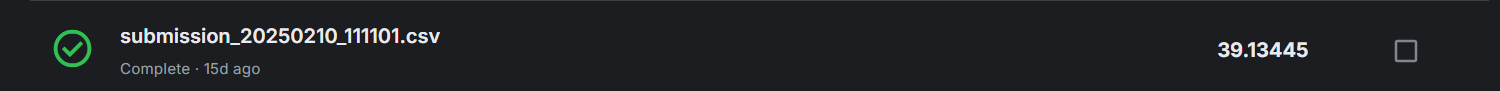

##### **this score not improved when compared to catboost thats it**
##### **I tried my best to improve my score as much as i possible and i tried my best**

# **Thank You**

In [ ]:
so